In [1]:
# Fetch data
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/raw/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
# Load Data
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


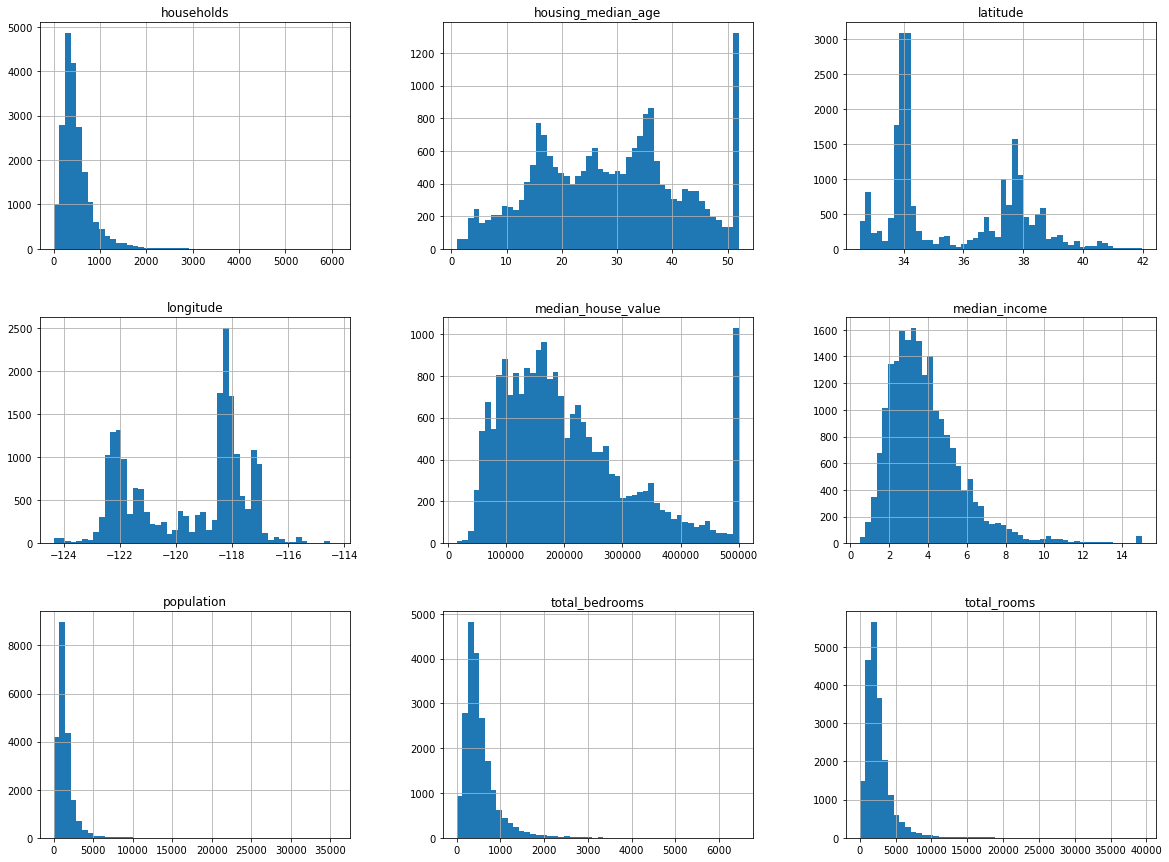

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(21)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(housing, .2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


NameError: name 'test' is not defined

In [10]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cathousing_cat_encoded.reshape(-1, 1)"].where(housing["income_cat"] < 5, 5.0, inplace=True)

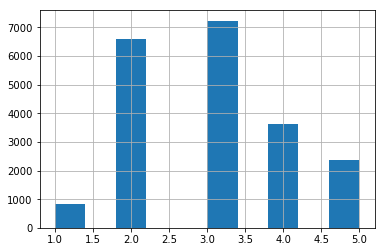

In [11]:
housing["income_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing["income_cat"].value_counts() / len(housing)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [71]:
housing = strat_train_set.copy()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
16365     92100.0
19684     61500.0
19234    313000.0
13956     89000.0
2390     123900.0
11176    197400.0
15614    500001.0
2953      63300.0
13209    107000.0
6569     184200.0
5825     280900.0
18086    500001.0
16718    171300.0
13600    116600.0
13989     60800.0
15168    121100.0
6747     270700.0
7398     109900.0
5562     159600.0
16121    500001.0
           ...   
12380    122500.0
5618     350000.0
10060    172800.0
18067    500001.0
4471     146600.0
19786     81300.0
9969     247600.0
14621    164100.0
579      254900.0
11682    185700.0
245      126800.0
12130    114200.0
16441    101800.0
11016    265600.0
19934     88900.0
1364     225000.0
1236     123500.0
5364     500001.0
11703    321600.0
10356    266000.0
15270    346700.0
3754     190200.0
12166    148800.0
6003     214800.0
7364     1

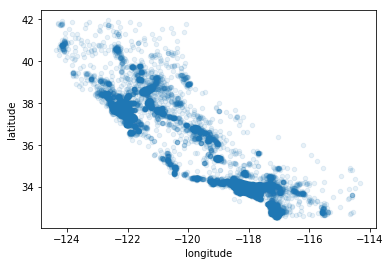

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

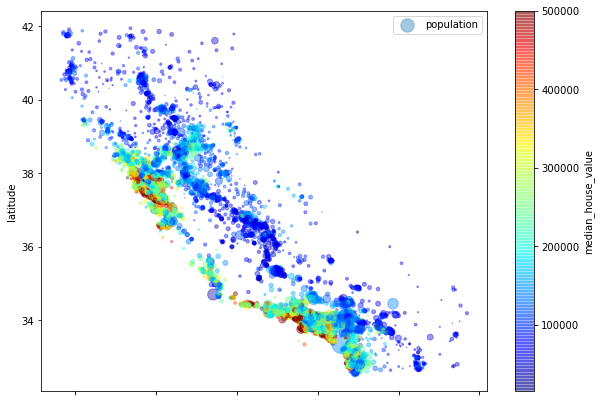

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

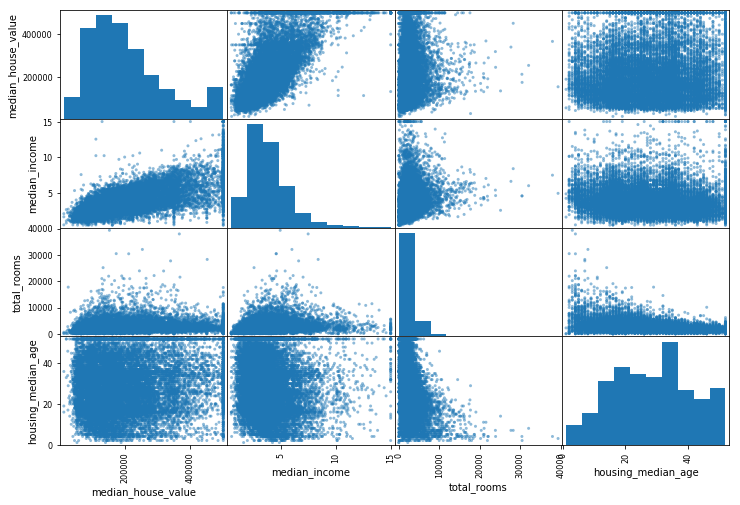

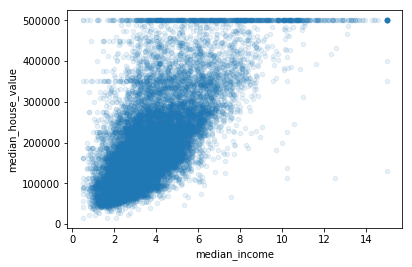

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [19]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [73]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [74]:
# Data Cleaning - Fill in missing features
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1) #Drop text attribute (Imputer only works with numbers)
imputer.fit(housing_num) # Fit imputer instance to the training data
imputer.statistics_ # imputer computed the medians and stored in statistics.

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [75]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [76]:
X = imputer.transform(housing_num) # Use trained imputer to transform data setby replacing missing values with medians
housing_tr=pd.DataFrame(X, columns=housing_num.columns) # Convert np array to Pandas DataFrame

# Handling Text and Categorical Attributes

In [77]:
# Convert text labels to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [78]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [79]:
print (housing_cat_encoded)
housing_cat_encoded.reshape(-1, 1)

[0 0 4 ..., 1 0 3]


array([[0],
       [0],
       [4],
       ..., 
       [1],
       [0],
       [3]])

In [80]:
# One-hot encode ocean_proximity category column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [81]:
from sklearn.preprocessing import LabelBinarizer\
# sparse_output converts np array to sparse matrix
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# Custom Transformers

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, bedrooms_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [83]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        1.0353982300884956],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        0.9557522123893806],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        1.0194805194805194],
       ..., 
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        1.1398692810457516],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        1.0674157303370786],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.0672926447574336]], dtype=object)

# Transformation Pipelines

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Custom transformer to convert pandas DF to np array
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [85]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

In [86]:
# Join transformer pipelines for numeric and categorical columns
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared
housing_prepared.shape

(16512, 16)

# Training and evaluating the training set

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

Predictions: [ 209135.10451527  316083.29006038  209469.10271194   58731.39208715
  186933.68455019]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [92]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68234.692515003699

In [93]:
# Improve predictions by using a more complex model (decision tree regression)
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [94]:
# Evaluate the model on the training set
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#Overfit!

0.0

# Cross-Validation

In [103]:
# Decision Tree scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [105]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Dev.:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [ 70542.47487107  67586.90523594  72056.39042363  69100.28458014
  70589.89576033  72671.52692666  69526.98280798  70598.96810543
  71946.5386412   72628.29079071]
Mean: 70724.8258143
Standard Dev.: 1570.55010973


In [106]:
# Linear regression scores
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66398.89817757  66551.26163361  67545.69721212  74620.69819267
  67525.84879287  70888.25863323  64795.32164948  68145.95597095
  70393.62895799  67399.41417145]
Mean: 68426.4983392
Standard Dev.: 2680.14335157


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


In [116]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
display_scores(forest_rmse_scores)

22420.5933933
Scores: [ 51058.23058909  49094.0691589   52787.53815397  52989.68601833
  52967.20526055  55743.52575952  51987.91682849  54209.68055163
  54823.11311608  53051.73538687]
Mean: 52871.2700823
Standard Dev.: 1795.78292489


In [119]:
# Pickle/export models
from sklearn.externals import joblib

joblib.dump(forest_reg, "forest_reg.pkl")

imported_forest = joblib.load("forest_reg.pkl")
imported_forest.predict(housing_prepared)

array([ 253650. ,  317940. ,  205110. , ...,  103090. ,  212970. ,
        491460.9])

# Fine tune the models
## Grid Search

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 40], 'max_features':[2, 4, 6, 8, 9]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8, 9]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [129]:
grid_search.best_params_

{'max_features': 9, 'n_estimators': 40}

In [127]:
# Directly obtain best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:
# Obtain evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66712.6314749 {'max_features': 2, 'n_estimators': 3}
58257.2050825 {'max_features': 2, 'n_estimators': 10}
55269.1147889 {'max_features': 2, 'n_estimators': 30}
54587.1494064 {'max_features': 2, 'n_estimators': 40}
62288.1585718 {'max_features': 4, 'n_estimators': 3}
54801.8491833 {'max_features': 4, 'n_estimators': 10}
52534.9737218 {'max_features': 4, 'n_estimators': 30}
52549.2708223 {'max_features': 4, 'n_estimators': 40}
60437.9869153 {'max_features': 6, 'n_estimators': 3}
53937.8592938 {'max_features': 6, 'n_estimators': 10}
51550.3221261 {'max_features': 6, 'n_estimators': 30}
51120.9805263 {'max_features': 6, 'n_estimators': 40}
60900.6623358 {'max_features': 8, 'n_estimators': 3}
53160.5618169 {'max_features': 8, 'n_estimators': 10}
51084.0820957 {'max_features': 8, 'n_estimators': 30}
51246.584107 {'max_features': 8, 'n_estimators': 40}
60711.1743456 {'max_features': 9, 'n_estimators': 3}
52739.3255696 {'max_features': 9, 'n_estimators': 10}
51121.7773596 {'max_features': 9, 

# Analyze the Best Models and their Errors

In [130]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  9.33046801e-02,   8.03193874e-02,   4.60614175e-02,
         1.96009895e-02,   2.02414039e-02,   2.70944819e-02,
         1.82648303e-02,   4.15565146e-01,   3.56301062e-02,
         2.58513501e-02,   5.27713484e-02,   1.10752656e-02,
         1.44888173e-01,   2.69123828e-05,   3.58710178e-03,
         5.71740588e-03])

In [131]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_house"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.41556514579739356, 'median_income'),
 (0.14488817316711178, 'INLAND'),
 (0.093304680087035685, 'longitude'),
 (0.080319387420029503, 'latitude'),
 (0.05277134840307951, 'bedrooms_per_house'),
 (0.046061417521862366, 'housing_median_age'),
 (0.035630106238770609, 'rooms_per_hhold'),
 (0.027094481869749797, 'population'),
 (0.025851350129450622, 'pop_per_hhold'),
 (0.020241403918310013, 'total_bedrooms'),
 (0.019600989501545103, 'total_rooms'),
 (0.018264830344844118, 'households'),
 (0.011075265553713487, '<1H OCEAN'),
 (0.00571740588026991, 'NEAR OCEAN'),
 (0.0035871017840578357, 'NEAR BAY'),
 (2.6912382775962378e-05, 'ISLAND')]

# Evaluate your system on the test set

In [133]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

48405.6218213
